In [46]:
import json, argparse, os
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("./tplot.mplstyle")

In [37]:
Ni=np.array([20,30, 50, 75, 100, 120, 150])
ab=10.0
t2=20.0
t3=50.0
a=10.0
b=1.0
natfreqs=np.array([0.638, 0.777, 0.725, 0.669,0.770, 0.710, 0.716])
maxargs=np.array([83, 101, 94, 87, 94, 92, 94])
omega0s=np.arange(0.01, 0.26, 0.005)
dt_dump=1.0 
dts=np.ones_like(Ni)*dt_dump
tf=10001.1*np.ones_like(Ni)

20


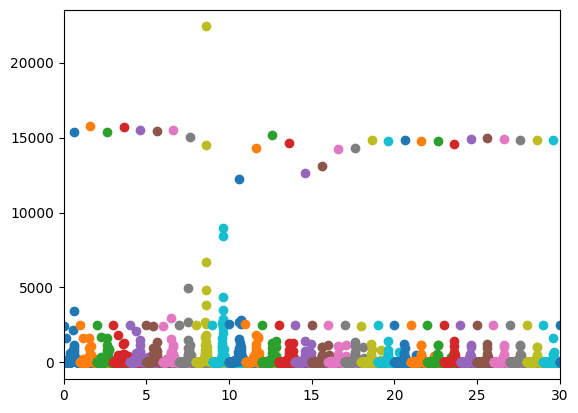

30


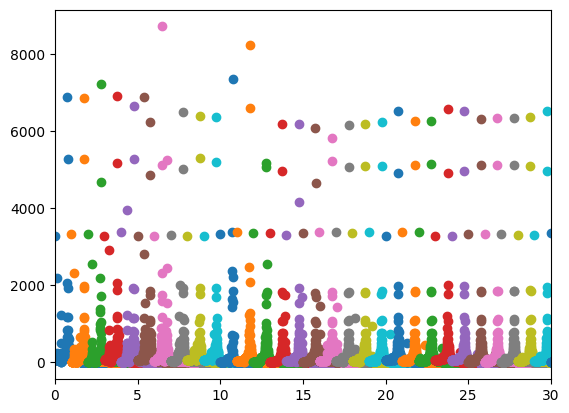

50


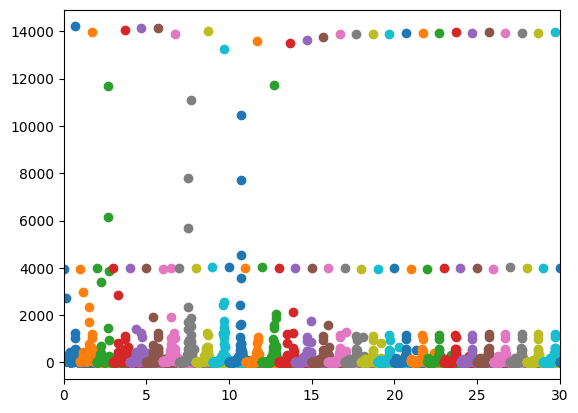

75


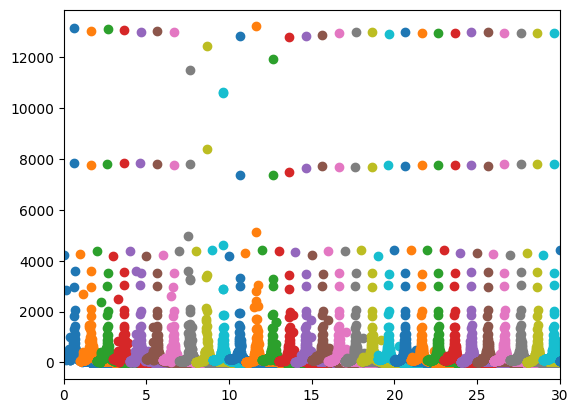

100


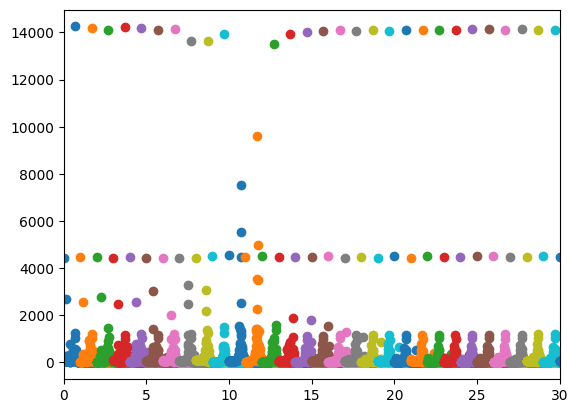

120


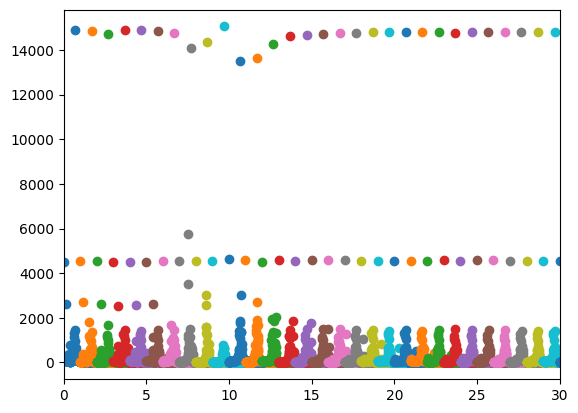

150


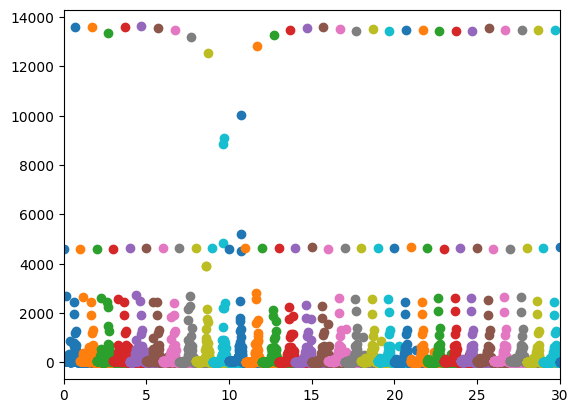

In [42]:
peaksN = []
maxdispN=[]
j=0
for N in Ni:
	print(N)
	Sols=[]
	for omega0 in omega0s:
		Sols.append(np.fromfile("square_wave_strain/{:d}/{:1.1f}/{:1.1f}/{:1.1f}/solution_{:1.3f}.dat".format(N, ab, t2, t3, omega0)))
		Sols[-1]=Sols[-1].reshape(len(Sols[-1])//(3*N+1), 3*N+1)
		Sols[-1]=Sols[-1][:,:N+1]
		#plt.plot(Sols[-1][-1000:,:N+1]-np.arange(0,N+1)[np.newaxis,:])
		#plt.show()
	
	#find the value of max amplitude for the last 50 timepoints
	Sols = np.asarray(Sols)
	#to find displacement, subtract each r_i from its original position
	displacement = Sols-np.arange(0,N+1,1)[np.newaxis,np.newaxis,:]
	#if (xmid[j]-int(xmid[j])) != 0: #if the number of cells is odd and there is no middle point, take avg of the two points in the middle
	#	displacement[:,:,int(xmid[j])] = (displacement[:,:,int(xmid[j])]+displacement[:,:,int(xmid[j]+1)])/2
	#xmax = np.argmax(np.max(displacement, axis=1),axis=1)
	dispfft = np.fft.rfft(displacement[:,:,10], axis=1)
	omegafft = np.fft.rfftfreq(len(displacement[0,:,0]), dts[j])
	fftmags = abs(dispfft); 
	Ampfft = np.zeros_like(dispfft)
	peaks = np.zeros_like(omega0s)
	peakpts = 5
	for i in np.arange(0,len(omega0s),1):
		#print(N, np.argmax(fftmags[i]), omegafft[np.argmax(fftmags[i])]*24*np.pi)
		#Ampfft[i,maxargs[j]-15:maxargs[j]+15] += dispfft[i,maxargs[j]-15:maxargs[j]+15]
		index = np.argmax(fftmags[i])
		peaks[i] += omegafft[index]*24*np.pi
		index=maxargs[j]
		Ampfft[i,index-peakpts:index+peakpts+1] += dispfft[i,index-peakpts:index+peakpts+1]
		#Ampfft[i,index] += dispfft[i,index]
		plt.scatter(i+omegafft*24*np.pi,abs(fftmags[i]))
		plt.xlim(0,30)
	plt.show()
	peaksN.append(peaks)
	idisplacement = np.fft.irfft(Ampfft, axis=1, n=len(displacement[0,:,0]))
	#if N==50 or N==20:
		#for i in np.arange(len(omega0s)-20):
			#plt.plot(np.arange(len(idisplacement[i])),10*i+idisplacement[i])
			#plt.plot(omegafft*12*2*np.pi, np.abs(fftmags[i+2]))
			#plt.xlim(0,3)
		#plt.show()
		#for i in np.arange(len(omega0s)-20):
			#plt.plot(np.arange(len(idisplacement[i])),10*i+idisplacement[i])
			#plt.plot(omegafft*12*2*np.pi, np.angle(dispfft[i+2]))
			#plt.xlim(0,3)
		#plt.show()
	#from this maximum over all cells take maximum over all times
	maxdisplacement = np.max(idisplacement,axis=1)
	maxdisplacement /= np.max(maxdisplacement)
	maxdispN.append(maxdisplacement)
	j+=1

peaksN = np.asarray(peaksN)
#peaksN = peaksN/natfreqs[:,np.newaxis]

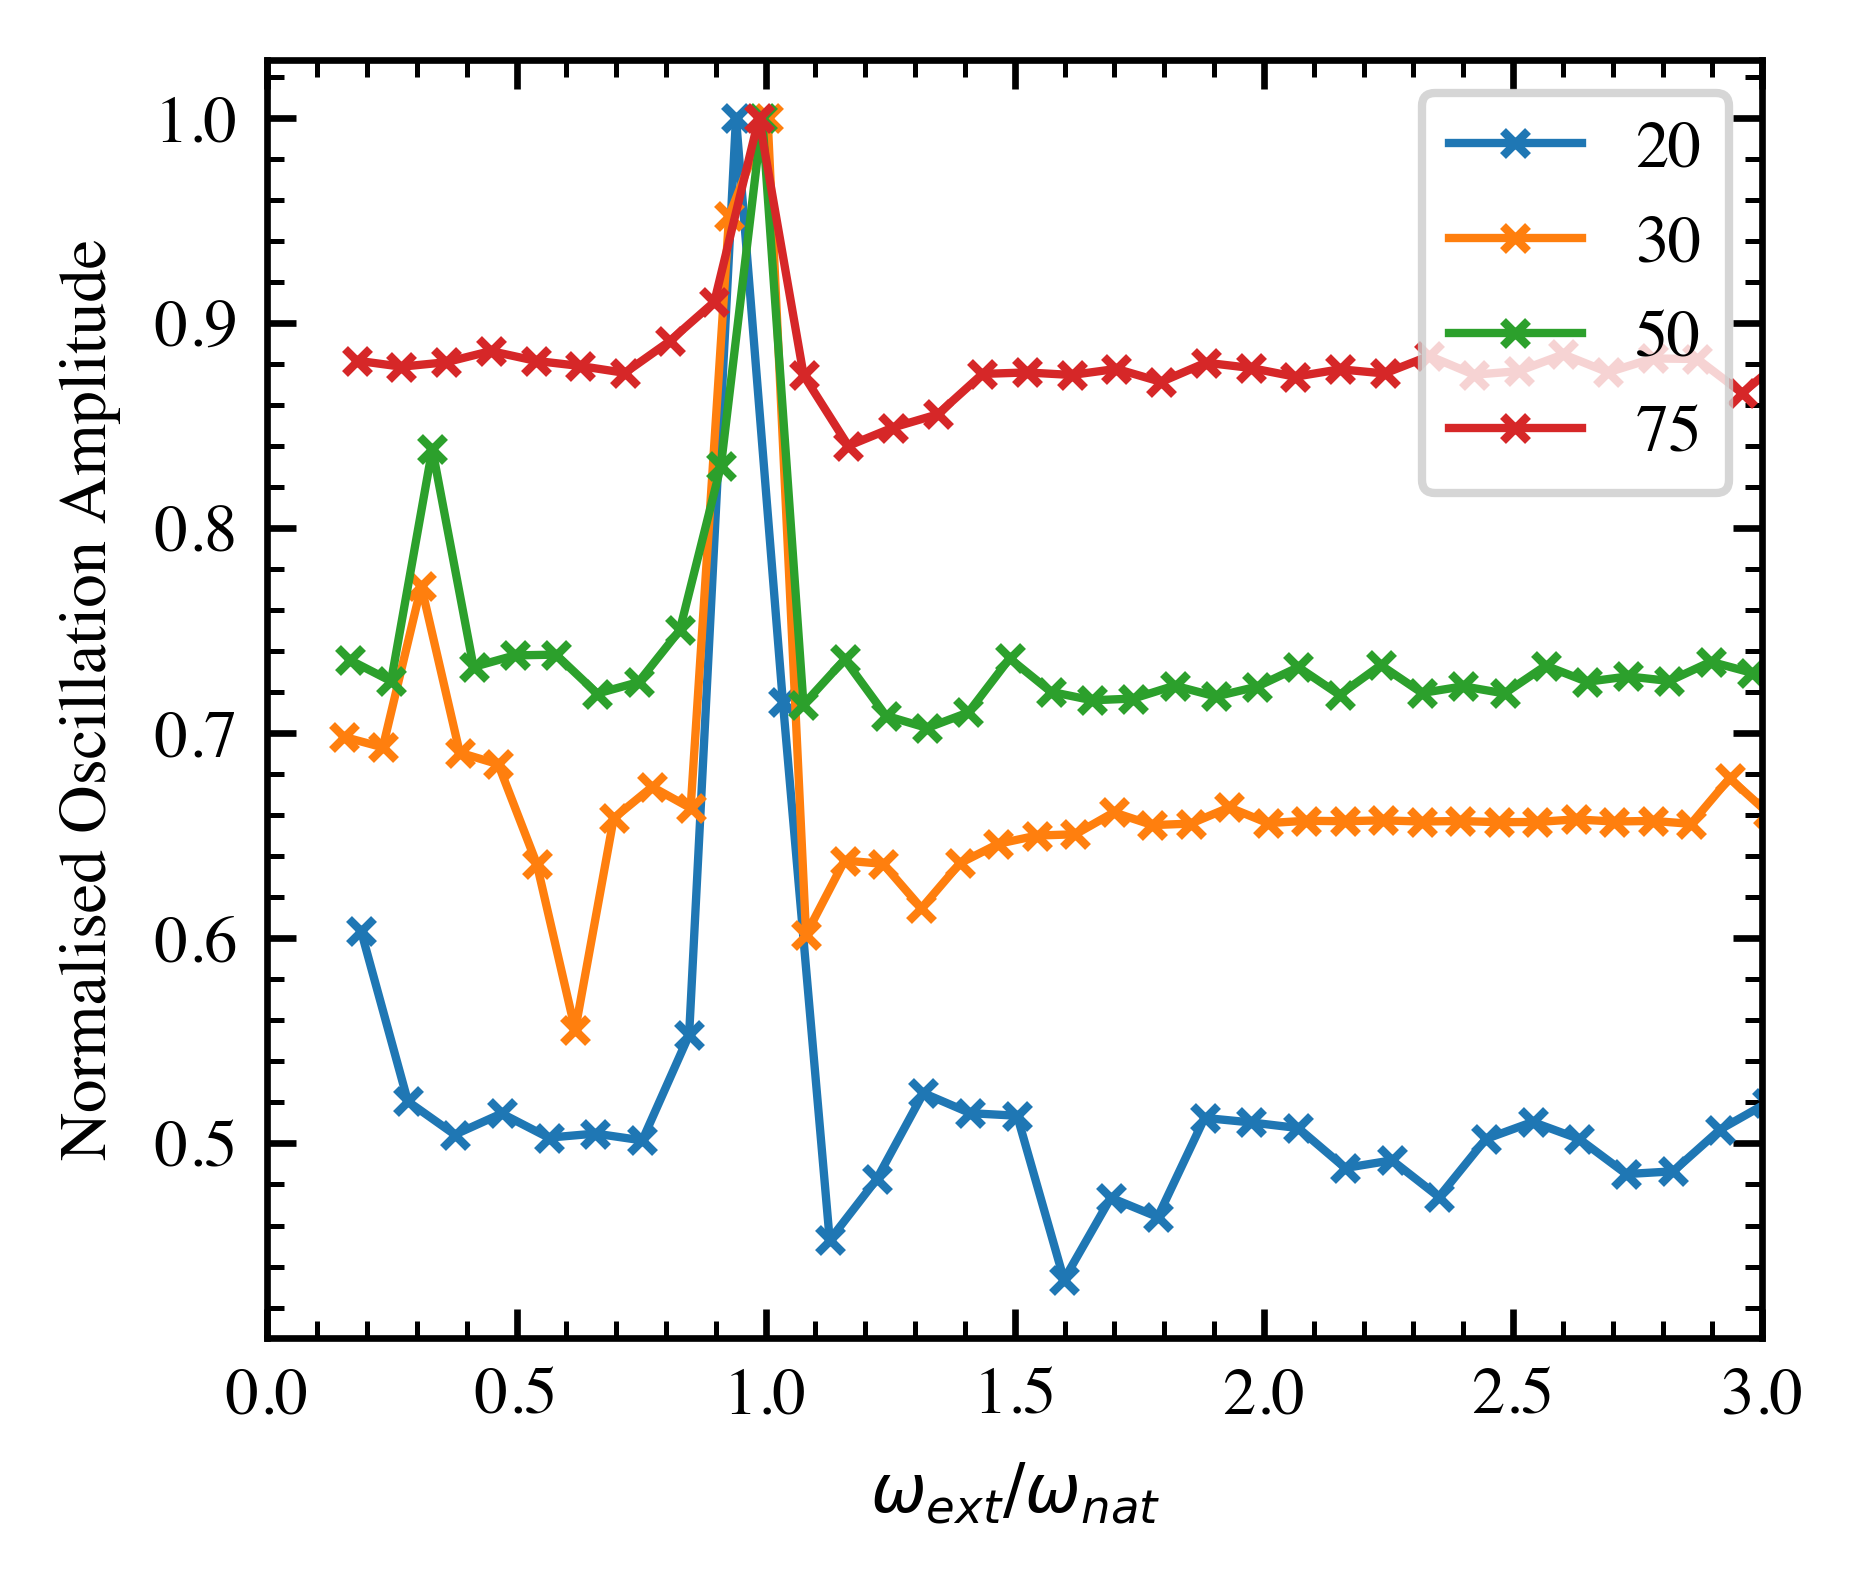

In [49]:
fig, ax = plt.subplots()
for i in np.arange(0,len(Ni)):#[0,1,3,5,7]:
	if i<4:
		plt.plot((omega0s*12/natfreqs[i]), maxdispN[i],label=Ni[i], marker='x')
	    #plt.axvline(x=natfreqs[i], linestyle='dashed', color='black')
plt.xlabel(r'$\omega_{ext}/\omega_{nat}$')
plt.ylabel('Normalised Oscillation Amplitude')
plt.legend()
plt.xlim(0,3)
#plt.savefig('Figures_SI/resonance_plot_square.png')
plt.show()

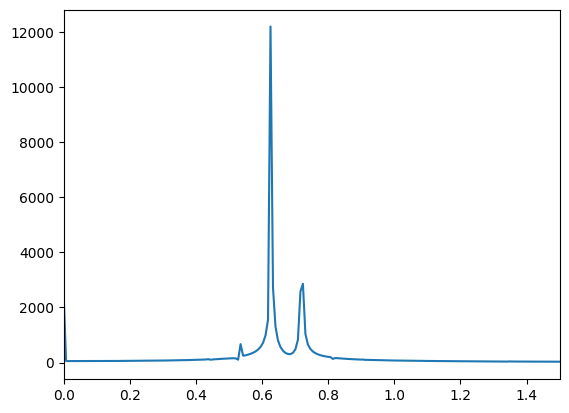

In [28]:
n=0
w=10
Sol = Sols[n][w]
dispfft = np.fft.rfft(Sol[:,10], axis=0)
omegafft = np.fft.rfftfreq(len(Sol[:,0]), dt_dump)
fftmags = abs(dispfft)
plt.plot(omegafft*24*np.pi, fftmags)
plt.xlim(0,1.5)
plt.show()